In [143]:
library(readr)
library(dplyr)
library(ggplot2)
library(scales)
library(tidyverse)

In [144]:
fraud_data <- read.csv("fraud.csv")

### EXPLORATORY DATA ANALYSIS

In [145]:
head(fraud_data, 15) # View first 15 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-0.6980436,-0.04419812,1.68116732,0.9745233,-0.245692619,0.34715606,0.195166246,0.08370937,0.3320762,⋯,-0.02528877,0.38346201,-0.17712600,0.11051044,0.2466123,-0.3923114,0.33748690,-0.06418093,149.62,0
2,0,0.6118281,0.16162642,0.11034805,0.3168994,0.043585540,-0.06183566,-0.064189379,0.07217789,-0.2331601,⋯,-0.31188331,-0.88147339,0.16239800,-0.56114844,0.3207289,0.2611633,-0.02269927,0.04488712,2.69,0
3,1,-0.6972977,-0.81384628,1.17533678,0.2685503,-0.365428546,1.35179670,0.644688631,0.21006306,-1.3826241,⋯,0.34258177,1.06504576,1.45808689,-1.13812842,-0.6286053,-0.2885504,-0.13987025,-0.18215547,378.66,0
4,1,-0.4960260,-0.11248295,1.18845021,-0.6104519,-0.007486433,0.93638751,0.193545596,0.32011743,-1.2661192,⋯,-0.14960499,0.00727844,-0.30514637,-1.94108902,1.2420391,-0.4603827,0.15849354,0.18735562,123.50,0
5,2,-0.5945675,0.53302677,1.02653703,0.2849940,-0.295708736,0.07201686,0.482982963,-0.22944885,0.7464582,⋯,-0.01302746,1.10175693,-0.22039050,0.23325752,-0.3952447,1.0419856,0.55445514,0.65590152,69.99,0
6,2,-0.2186654,0.58330073,0.75636178,-0.1189747,0.305725744,-0.02231914,0.387891955,0.22078229,-0.5191011,⋯,-0.28767899,-0.77265121,-0.04232414,-0.61329295,-0.4466323,0.2197161,0.64143563,0.24717586,3.67,0
7,4,0.6312326,0.08562777,0.03007312,0.8503934,0.139346285,0.20474650,-0.004202293,0.06887972,0.4244301,⋯,-0.23168130,-0.37362439,-0.24707904,-1.28801359,1.4391936,-0.5336278,0.08719637,0.01575412,4.99,0
8,7,-0.3307294,0.86109248,0.71213181,-0.3480445,0.689127371,0.32142701,0.912816091,-3.22959157,0.5617334,⋯,2.68468047,-1.40149618,0.09219707,-1.07278792,-0.7967198,-0.1071133,-3.04975298,-3.30869257,40.80,0
9,7,-0.4590729,0.17377584,-0.07502722,-0.1920020,1.938694705,2.79430331,0.301503636,0.72183643,-0.3578734,⋯,-0.10142858,-0.37001099,-0.32745213,1.67032234,0.7160210,-0.7969193,0.02968424,0.43412433,93.20,0


In [146]:
tail(fraud_data, 15) # View last 15 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
283712,172774,-0.37172132,0.901932938,-0.7504684,-0.4293573,0.515246549,-0.3623598,0.44669646,0.290913896,-0.20659470,⋯,0.5727521,1.8045825,-0.09546942,0.40069044,-1.2766664,-0.5598333,-0.431033989,-0.09356710,3.99,0
283713,172775,1.01179455,-0.424525440,-1.1251814,-0.4367488,1.248210846,2.9365916,-1.02577396,0.895810274,1.20037920,⋯,0.2607477,0.9584128,0.26134628,1.19936044,-0.1118177,-0.3979082,0.156309161,-0.13327063,4.99,0
283714,172777,-0.65018644,-0.243189734,0.6338123,-0.5118985,1.112552062,-1.3428628,0.25637398,0.003990026,0.01264871,⋯,-0.2180263,-1.2191907,0.14187132,-0.12679430,-0.1838620,0.2753223,-0.071935161,0.38562041,0.89,0
283715,172778,-6.42534080,6.186797657,-5.6185937,-1.7752098,-3.330894387,-1.0469500,-2.95888493,4.663552768,4.46656565,⋯,-1.3050786,-2.1599961,1.42804443,-2.06938670,3.4279493,0.6654108,5.282992001,3.75842815,9.87,0
283716,172780,0.96756862,-0.087168078,-0.6627925,1.0654709,-0.025634926,-0.4607130,0.15496176,-0.211235563,0.60836391,⋯,0.1989313,0.8759172,-0.06752289,-0.08785218,0.6070429,-0.9572413,0.046153080,-0.12519825,60.00,0
283717,172782,-0.12418875,0.432528846,0.2650033,-0.3276840,0.177581312,-1.0088123,0.75702195,-0.174894613,0.09697395,⋯,-0.3161663,-0.7099243,0.44828748,0.61331726,-1.0729401,0.2347136,0.332303553,0.24773924,5.49,0
283718,172782,0.11269307,0.535157683,-0.4214877,0.6794929,-0.111089225,-0.7615316,0.34791739,0.102913282,-0.26076830,⋯,0.1380502,0.4652815,0.40370341,0.09525304,-2.8939168,0.2987709,0.457884794,0.65617484,24.05,0
283719,172783,-0.91124802,-0.002572048,0.7886263,0.2341251,0.868595045,4.1443449,-1.23664542,1.764825429,1.05842638,⋯,0.1426997,0.9038014,-0.55944807,1.23066398,1.3517225,-0.2646570,1.148164697,0.39724729,79.99,0
283720,172784,1.04698789,-0.106414517,-0.7932920,0.1658763,-0.006327704,-0.5455024,0.01388782,-0.100273479,0.39744851,⋯,-0.3702790,-0.9898699,0.47768041,-0.59404371,-0.6055211,0.4172039,-0.204237738,-0.22885496,2.68,0


In [147]:
 # View structure of the dataset
 str(fraud_data) 

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -0.698 0.612 -0.697 -0.496 -0.595 ...
 $ V2    : num  -0.0442 0.1616 -0.8138 -0.1125 0.533 ...
 $ V3    : num  1.68 0.11 1.18 1.19 1.03 ...
 $ V4    : num  0.975 0.317 0.269 -0.61 0.285 ...
 $ V5    : num  -0.24569 0.04359 -0.36543 -0.00749 -0.29571 ...
 $ V6    : num  0.3472 -0.0618 1.3518 0.9364 0.072 ...
 $ V7    : num  0.1952 -0.0642 0.6447 0.1935 0.483 ...
 $ V8    : num  0.0837 0.0722 0.2101 0.3201 -0.2294 ...
 $ V9    : num  0.332 -0.233 -1.383 -1.266 0.746 ...
 $ V10   : num  0.0843 -0.1551 0.1929 -0.0511 0.6996 ...
 $ V11   : num  -0.541 1.583 0.613 -0.222 -0.808 ...
 $ V12   : num  -0.6211 1.0709 0.0664 0.1792 0.5411 ...
 $ V13   : num  -0.996 0.491 0.721 0.51 1.352 ...
 $ V14   : num  -0.327 -0.151 -0.174 -0.302 -1.176 ...
 $ V15   : num  1.605 0.695 2.564 -0.69 0.191 ...
 $ V16   : num  -0.538 0.531 -3.308 -1.213 -0.517 ...
 $ V17   : num  0.247 -0.136 1.317 -0.812 -0.281 ...

In [148]:
# Check the number of Rows in fraud_data
nrow(fraud_data) 

[1] 283726

In [149]:
# View the number of Coloums in fraud_data
ncol(fraud_data) 

[1] 31

In [150]:
 # Check the  column names
 names(fraud_data) 

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [151]:
summary(fraud_data)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

In [189]:
# Calculate summary statistics and tidy the output format
summary_metrics_time_amount <- fraud_data %>%
  summarise(across(c(Time, Amount,Class, V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V24,V25,V26,V27,V28), list(
    Mean = ~mean(., na.rm = TRUE),
    SD = ~sd(., na.rm = TRUE),
    Min = ~min(., na.rm = TRUE),
    Max = ~max(., na.rm = TRUE)
  ), .names = "{.col}_{.fn}")) %>%
  pivot_longer(
    cols = everything(),
    names_to = c("Variable", "Metric"),
    names_sep = "_"
  ) %>%
  pivot_wider(names_from = Metric, values_from = value)

# Print the result
summary_metrics_time_amount

Variable,Mean,SD,Min,Max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Time,9.481108e+04,4.748105e+04,0.000000,1.727920e+05
Amount,8.847269e+01,2.503994e+02,0.000000,2.569116e+04
Class,1.667101e-03,4.079618e-02,0.000000,1.000000e+00
V1,3.037510e-03,1.000000e+00,-28.956239,1.260214e+00
V2,-2.510930e-03,1.000000e+00,-44.158375,1.339509e+01
V3,1.069224e-03,1.000000e+00,-32.031662,6.219043e+00
V4,-2.097540e-03,1.000000e+00,-4.018693,1.193292e+01
V5,1.327196e-03,1.000000e+00,-82.601759,2.527339e+01
V6,-8.555162e-04,1.000000e+00,-19.641043,5.503412e+01


In [152]:
#Checking for missing values
colSums(is.na(fraud_data))

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

In [153]:
library(dplyr)
library(tidyr)

# Calculate summary statistics and tidy the output format
summary_metrics_time_amount <- fraud_data %>%
  summarise(across(c(Time, Amount), list(
    Mean = ~mean(., na.rm = TRUE),
    SD = ~sd(., na.rm = TRUE),
    Min = ~min(., na.rm = TRUE),
    Max = ~max(., na.rm = TRUE)
  ), .names = "{.col}_{.fn}")) %>%
  pivot_longer(
    cols = everything(),
    names_to = c("Variable", "Metric"),
    names_sep = "_"
  ) %>%
  pivot_wider(names_from = Metric, values_from = value)

# Print the result
summary_metrics_time_amount


Variable,Mean,SD,Min,Max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Time,94811.07760,47481.0479,0,172792.00
Amount,88.47269,250.3994,0,25691.16


In [154]:
# Class Distribution
class_distribution <- table(fraud_data$Class)
print(class_distribution)


     0      1 
283253    473 


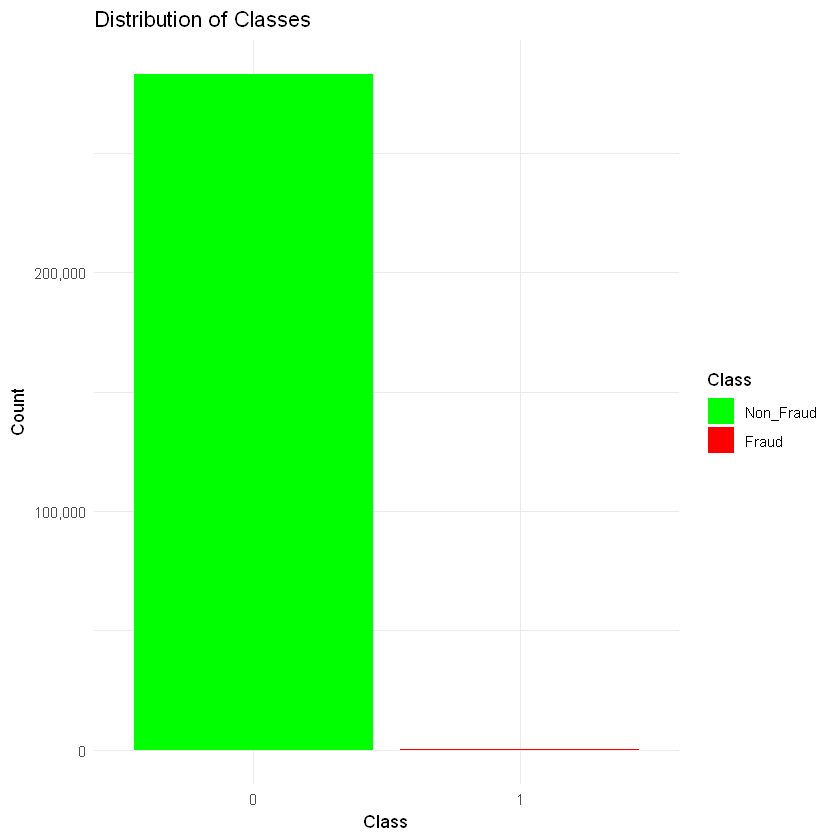

In [155]:
# Plotting Class Distribution
ggplot(fraud_data, aes(x = factor(Class), fill = factor(Class))) +
  geom_bar() +
  labs(x = "Class", y = "Count", fill = "Class", title = "Distribution of Classes") +
  scale_fill_manual(values = c("0" = "green", "1" = "red"), labels = c("Non_Fraud", "Fraud")) +
  scale_y_continuous(labels = scales::comma) +  # Use comma formatting for y-axis labels
  theme_minimal()

In [156]:
tail(fraud_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
283721,172785,0.06176323,0.56537527,-0.3619134,-0.5268740,0.820847627,-0.1771663,0.66200698,0.09761454,-0.1862756,⋯,-0.4340387,-1.1158925,0.08071584,0.16974085,-0.8362492,0.2573968,0.550709375,0.20974925,2.69,0
283722,172786,-6.09905464,6.11633378,-6.5187919,-1.4613768,-3.895744755,-1.9571871,-4.00615791,6.19592603,1.7475504,⋯,0.2948630,0.1543905,1.62654486,-0.84102708,2.7566211,0.5186863,2.384499716,2.51117120,0.77,0
283723,172787,-0.37616983,-0.03344895,1.3488793,-0.5222719,0.630518648,0.7946475,0.01981788,0.25008913,0.5338239,⋯,0.2959008,1.2758029,0.01998235,-1.67797370,-1.1638533,-0.8199412,0.173022183,-0.16318002,24.79,0
283724,172788,0.98538976,-0.18294365,-2.1539595,-0.3944523,1.910311768,2.2758394,-0.24178159,0.60083502,0.3947577,⋯,0.3205443,0.7980521,-0.06012620,1.05697765,0.5098524,-0.1812469,0.011256705,-0.08097157,67.88,0
283725,172788,-0.12342753,0.32214827,0.4656450,0.4877719,-0.274479929,0.4682734,-0.55893147,0.57600857,0.3579091,⋯,0.3664062,1.1042002,-0.26182030,0.20343430,-1.0919737,1.1340424,0.274977681,0.31867178,10.00,0
283726,172792,-0.27382206,-0.11522013,0.4661933,-0.3579953,-0.009110823,-0.4877256,1.28455863,-0.35168046,0.4437999,⋯,0.3606216,0.8875551,0.60409745,0.01452608,-0.9087303,-1.6974632,-0.006103212,0.04160917,217.00,0


Warning message:
"The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's fill values."


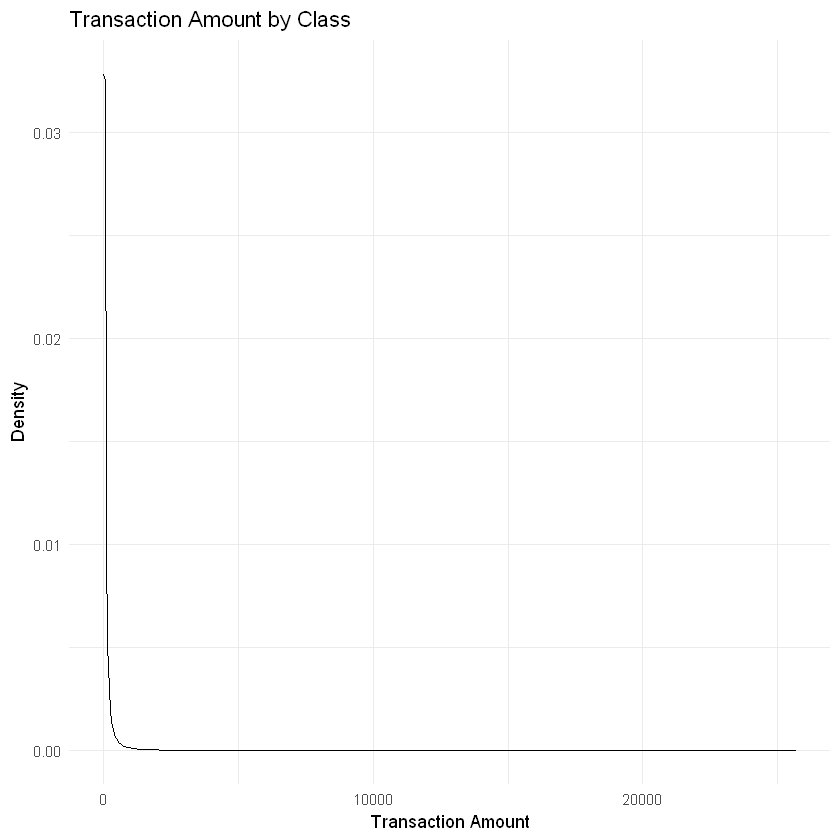

In [157]:
library(ggplot2)

# Create the density plot
ggplot(fraud_data, aes(x = Amount, fill = Class)) +
  geom_density(alpha = 0.5) +
  scale_fill_manual(values = c("Genuine" = "green", "Fraudulent" = "red")) +
  labs(
    x = "Transaction Amount",
    y = "Density",
    fill = "Class",
    title = "Transaction Amount by Class"
  ) +
  theme_minimal()


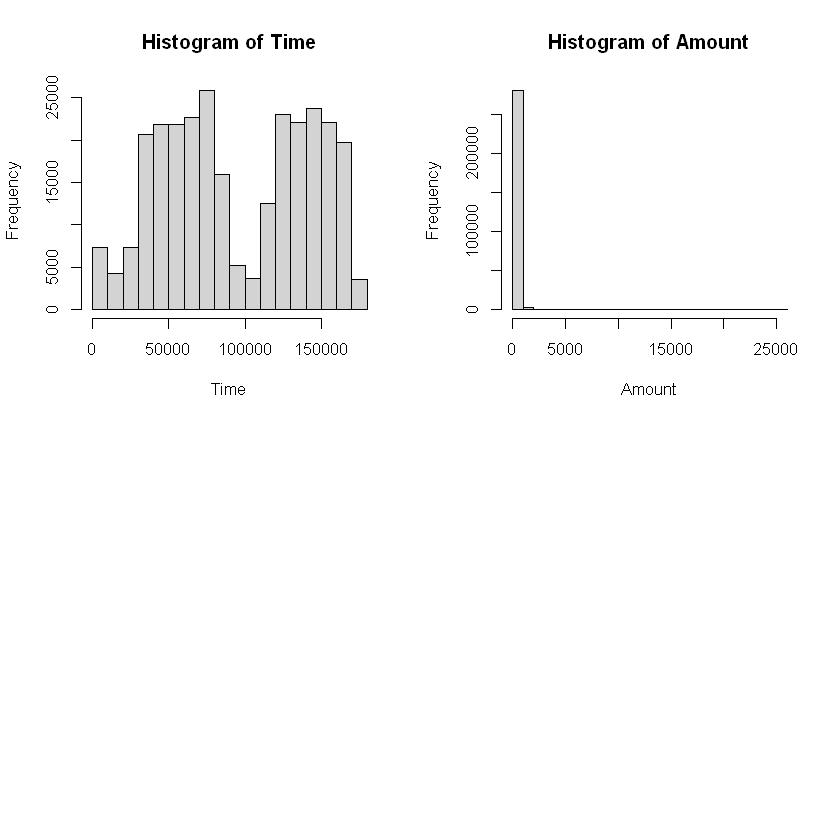

In [158]:
par(mfrow = c(2,2))  # Plotting area setup for 2 rows and 2 columns
hist(fraud_data$Time, main="Histogram of Time", xlab="Time")  # Histogram for 'Time'
hist(fraud_data$Amount, main="Histogram of Amount", xlab="Amount")  # Histogram for 'Amount'

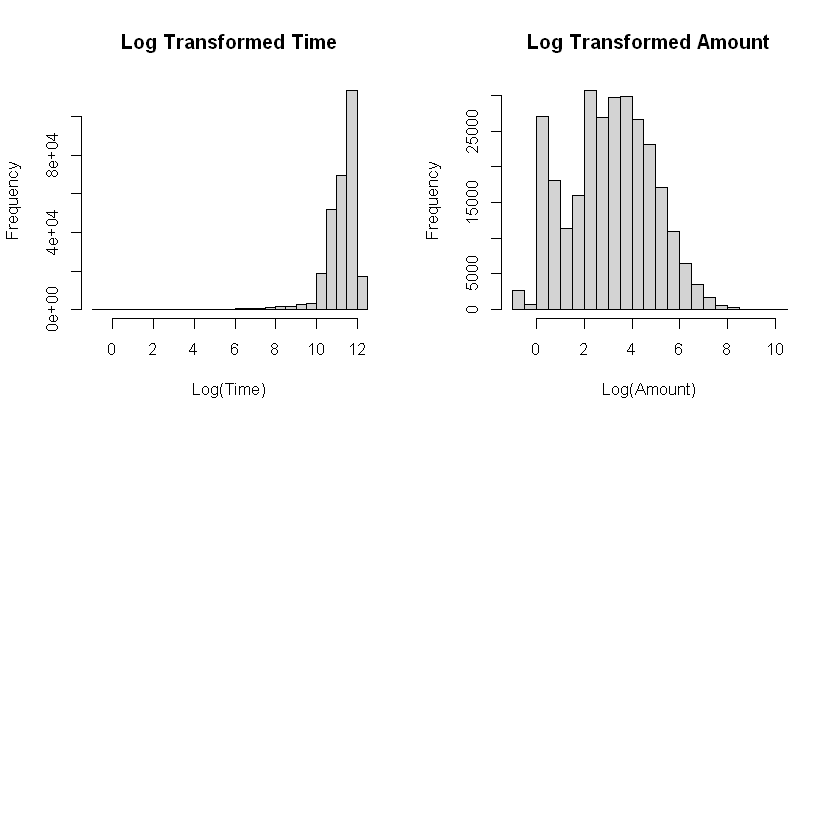

In [159]:
par(mfrow=c(2,2)) # Plotting area setup for 2 rows and 2 columns

# Histogram of Log Transformed 'Time'
hist(log(fraud_data$Time + 0.5), main="Log Transformed Time", xlab="Log(Time)")

# Histogram of Log Transformed 'Amount'
hist(log(fraud_data$Amount + 0.5), main="Log Transformed Amount", xlab="Log(Amount)")

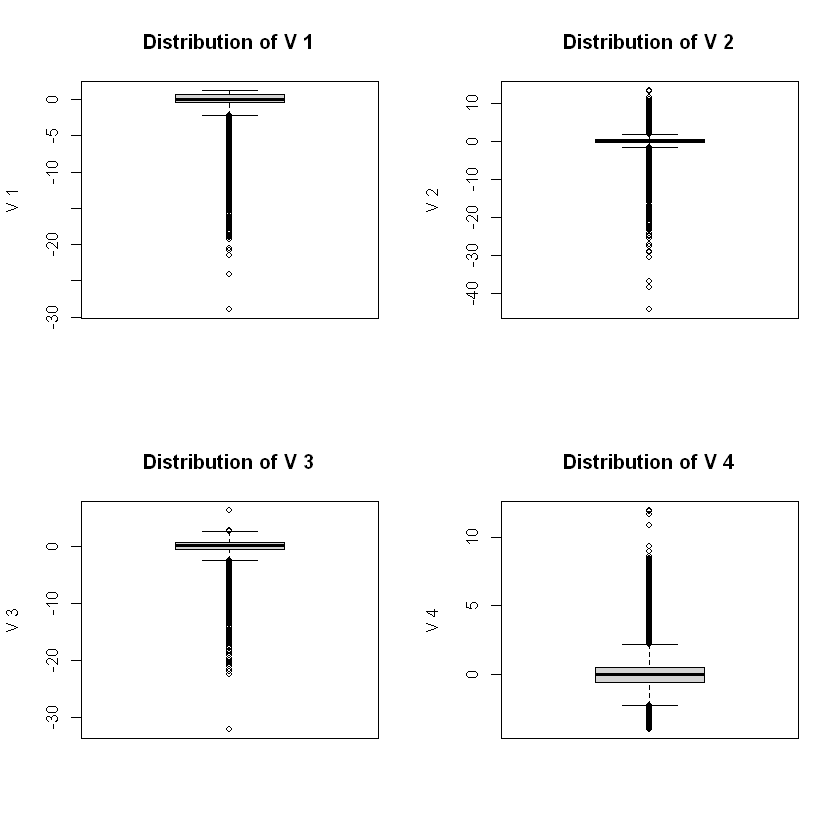

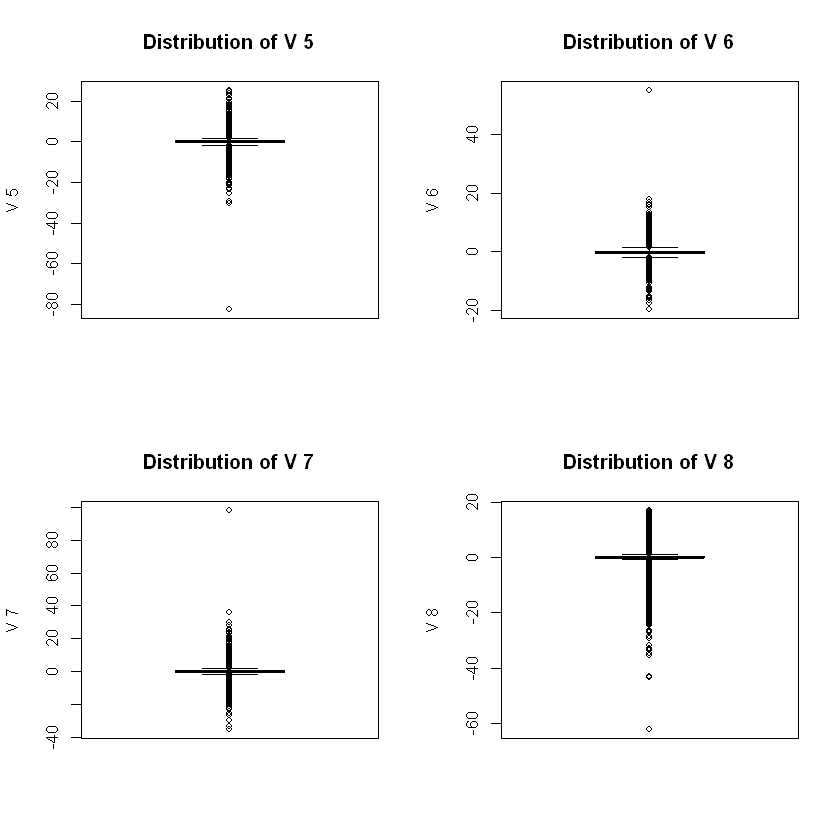

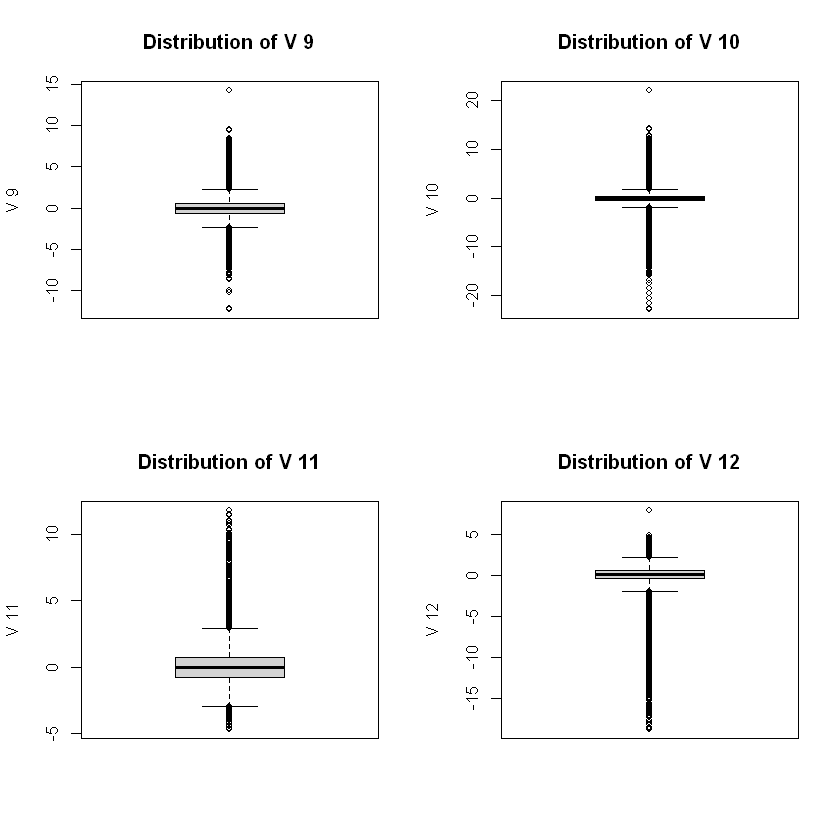

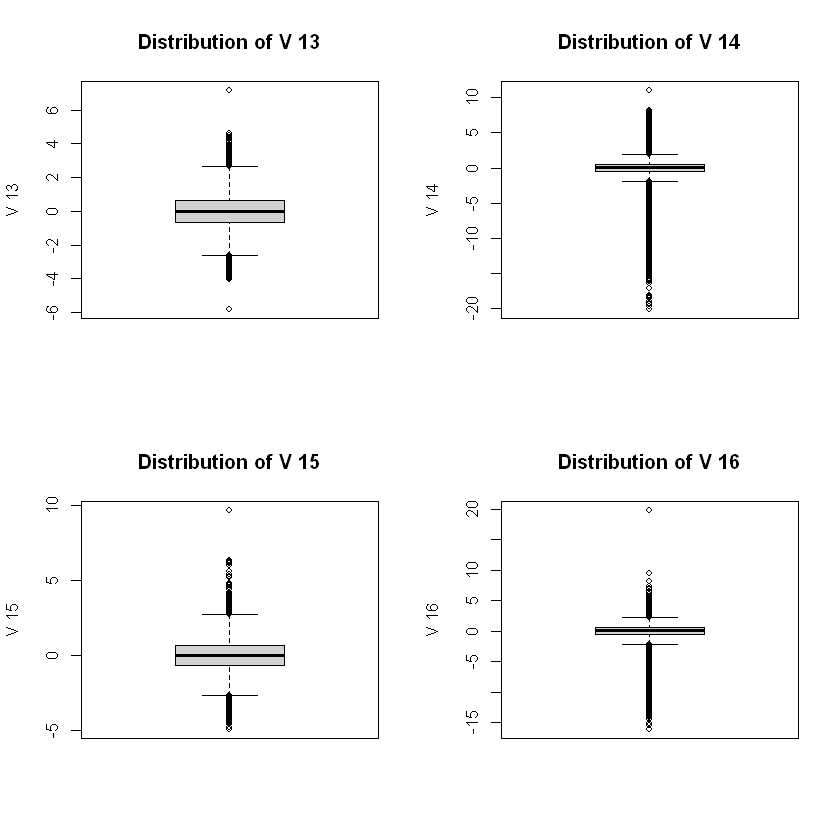

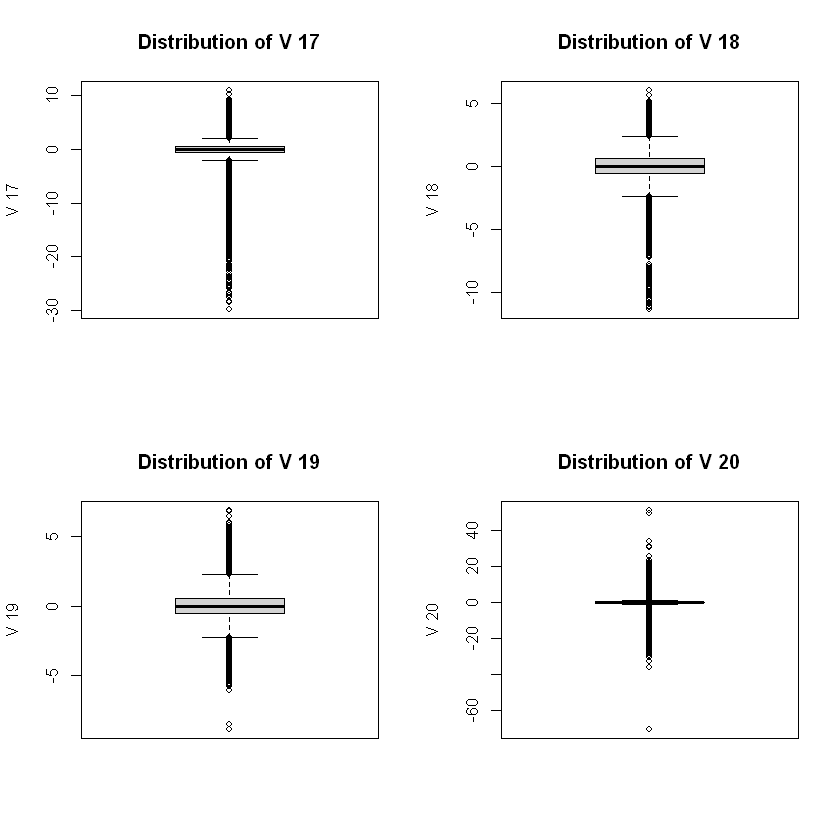

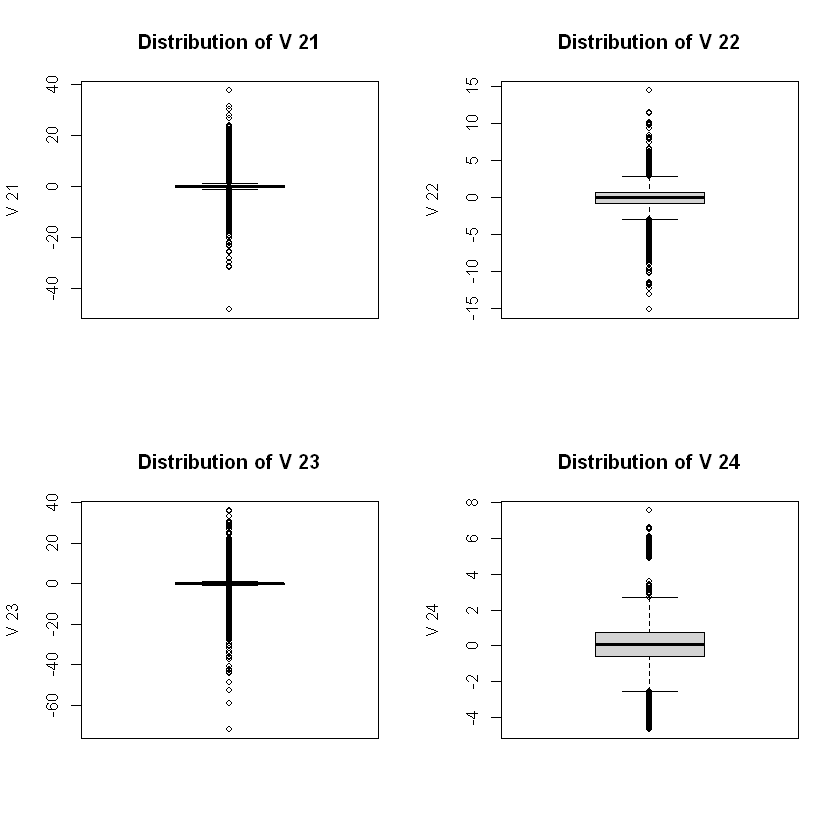

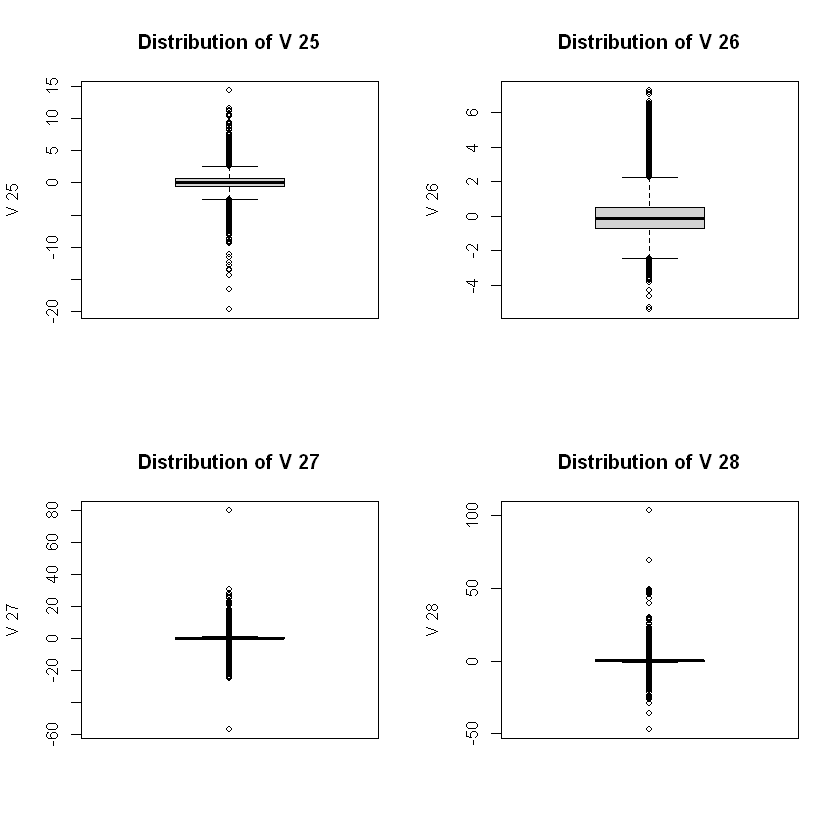

In [160]:
# Check for outliers
par(mfrow=c(2,2))

# Create box plots for V1 to V28
for (i in 1:28) {
  boxplot(fraud_data[, paste0("V", i)], main = paste("Distribution of V", i), ylab = paste("V", i))
}

In [161]:
# Subset the data to include only numeric variables
numeric_data <- fraud_data[, sapply(fraud_data, is.numeric)]

# Calculate the correlation matrix
correlation_matrix <- cor(numeric_data)

# Print the correlation matrix
print(correlation_matrix)

               Time            V1            V2            V3            V4
Time    1.000000000  0.1179266030 -0.0105555719 -4.220538e-01 -0.1058448928
V1      0.117926603  1.0000000000  0.0068749355 -8.111812e-03  0.0022573276
V2     -0.010555572  0.0068749355  1.0000000000  5.278252e-03 -0.0014952611
V3     -0.422053810 -0.0081118122  0.0052782517  1.000000e+00  0.0028287819
V4     -0.105844893  0.0022573276 -0.0014952611  2.828782e-03  1.0000000000
V5      0.173223011 -0.0070360158  0.0052098935 -6.878571e-03  0.0017442162
V6     -0.063279338  0.0004128357 -0.0005944499 -1.511482e-03 -0.0008804138
V7      0.085335181 -0.0091730804  0.0074247740 -1.172139e-02  0.0046569837
V8     -0.038203126 -0.0011682694  0.0028992257 -1.814670e-03  0.0008904924
V9     -0.007861473  0.0018280398 -0.0002739687 -3.578921e-03  0.0021543998
V10     0.031068100  0.0008152214  0.0006204527 -9.632286e-03  0.0027529558
V11    -0.248535957  0.0010280856 -0.0006332422  2.339002e-03 -0.0012228392
V12     0.12

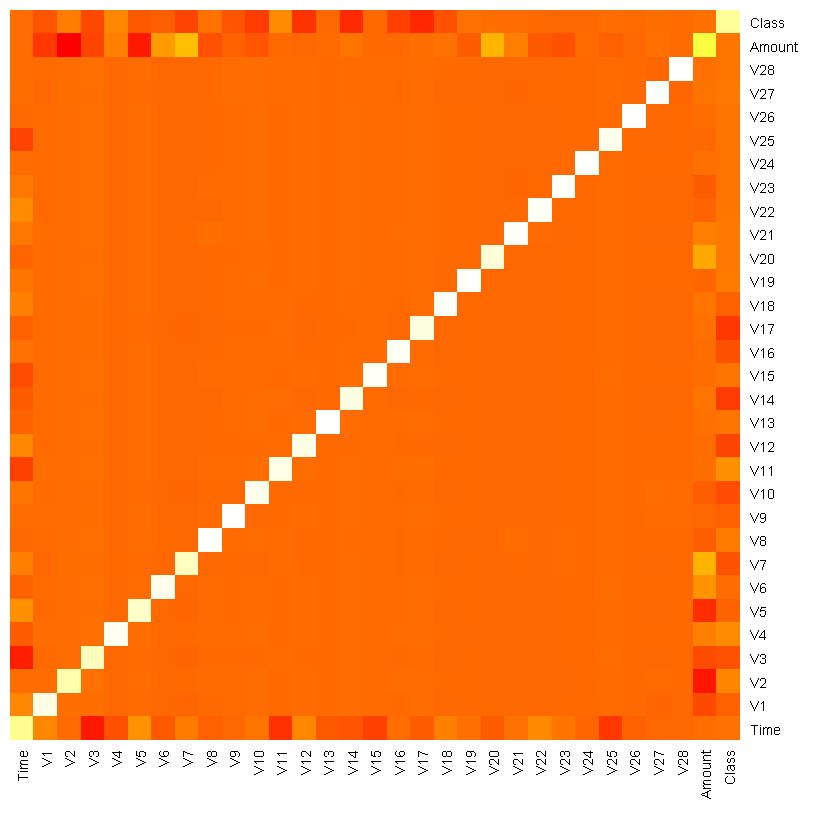

In [162]:
# Subset the data to include only numeric variables
numeric_data <- fraud_data[, sapply(fraud_data, is.numeric)]

# Calculate the correlation matrix
correlation_matrix <- cor(numeric_data)

# Visualize the correlation matrix using a heatmap
heatmap(correlation_matrix, Rowv=NA, Colv=NA, col = heat.colors(256), scale="column", margins=c(5,5))

In [163]:
library(caret)
# Remove class column from the dataset so it doesn't get normalized
sdataset <- subset(fraud_data,  select = -c(Class) )

In [164]:
# Normalize numerical features
preproc <- preProcess(sdataset, method = c("center", "scale"))
normalized_fraud_data <- predict(preproc, sdataset)

In [165]:
# Add the class column back to the dataset
normalized_fraud_data$Class<- fraud_data$Class

In [166]:
head(normalized_fraud_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-1.996819,-0.7010811,-0.04168719,1.6800981,0.9766208,-0.247019815,0.34801158,0.19369948,0.08443406,0.3335333,⋯,-0.02477684,0.38348275,-0.17744374,0.1101567,0.2470582,-0.3926214,0.33303192,-0.06584943,0.24419908,0
2,-1.996819,0.6087906,0.16413735,0.1092788,0.3189969,0.042258344,-0.06098015,-0.06565614,0.07290258,-0.2317030,⋯,-0.31137137,-0.88145265,0.16208027,-0.5615021,0.3211747,0.2608533,-0.02715426,0.04321862,-0.34258339,0
3,-1.996798,-0.7003352,-0.81133535,1.1742676,0.2706479,-0.366755742,1.35265222,0.64322187,0.21078776,-1.3811671,⋯,0.34309370,1.06506650,1.45776916,-1.1384821,-0.6281594,-0.2888604,-0.14432523,-0.18382397,1.15889762,0
4,-1.996798,-0.4990636,-0.10997202,1.1873810,-0.6083543,-0.008813629,0.93724302,0.19207883,0.32084212,-1.2646621,⋯,-0.14909305,0.00729918,-0.30546411,-1.9414427,1.2424850,-0.4606927,0.15403856,0.18568712,0.13988575,0
5,-1.996777,-0.5976050,0.53553770,1.0254678,0.2870915,-0.297035932,0.07287238,0.48151620,-0.22872415,0.7479152,⋯,-0.01251552,1.10177767,-0.22070823,0.2329038,-0.3947989,1.0416756,0.55000016,0.65423302,-0.07381281,0
6,-1.996777,-0.2217029,0.58581166,0.7552926,-0.1168771,0.304398548,-0.02146363,0.38642519,0.22150698,-0.5176441,⋯,-0.28716706,-0.77263047,-0.04264187,-0.6136466,-0.4461864,0.2194061,0.63698065,0.24550736,-0.33866964,0


In [167]:
# Ensure 'fraud_data' is a factor with two levels: 0 and 1
normalized_fraud_data$Class <- factor(normalized_fraud_data$Class, levels = c(0, 1))

In [168]:
head(normalized_fraud_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.996819,-0.7010811,-0.04168719,1.6800981,0.9766208,-0.247019815,0.34801158,0.19369948,0.08443406,0.3335333,⋯,-0.02477684,0.38348275,-0.17744374,0.1101567,0.2470582,-0.3926214,0.33303192,-0.06584943,0.24419908,0
2,-1.996819,0.6087906,0.16413735,0.1092788,0.3189969,0.042258344,-0.06098015,-0.06565614,0.07290258,-0.2317030,⋯,-0.31137137,-0.88145265,0.16208027,-0.5615021,0.3211747,0.2608533,-0.02715426,0.04321862,-0.34258339,0
3,-1.996798,-0.7003352,-0.81133535,1.1742676,0.2706479,-0.366755742,1.35265222,0.64322187,0.21078776,-1.3811671,⋯,0.34309370,1.06506650,1.45776916,-1.1384821,-0.6281594,-0.2888604,-0.14432523,-0.18382397,1.15889762,0
4,-1.996798,-0.4990636,-0.10997202,1.1873810,-0.6083543,-0.008813629,0.93724302,0.19207883,0.32084212,-1.2646621,⋯,-0.14909305,0.00729918,-0.30546411,-1.9414427,1.2424850,-0.4606927,0.15403856,0.18568712,0.13988575,0
5,-1.996777,-0.5976050,0.53553770,1.0254678,0.2870915,-0.297035932,0.07287238,0.48151620,-0.22872415,0.7479152,⋯,-0.01251552,1.10177767,-0.22070823,0.2329038,-0.3947989,1.0416756,0.55000016,0.65423302,-0.07381281,0
6,-1.996777,-0.2217029,0.58581166,0.7552926,-0.1168771,0.304398548,-0.02146363,0.38642519,0.22150698,-0.5176441,⋯,-0.28716706,-0.77263047,-0.04264187,-0.6136466,-0.4461864,0.2194061,0.63698065,0.24550736,-0.33866964,0


In [169]:
library(ROSE)

X <- normalized_fraud_data[, !names(normalized_fraud_data) %in% "Class"]
y <- normalized_fraud_data$Class

# Perform SMOTE for oversampling and Random Undersampling for undersampling
oversampled_data <- ovun.sample(Class ~ ., data = normalized_fraud_data, method = "both", N = nrow(normalized_fraud_data), seed = 256)$data
# Print the value counts of the resampled 'Class'
table(oversampled_data$Class)


     0      1 
142436 141290 

### FIRST MODEL

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = binomial, data = oversampled_data)

Coefficients:
             Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.480015   0.018183 -191.386  < 2e-16 ***
Time        -0.399286   0.014201  -28.116  < 2e-16 ***
V1           1.354694   0.041895   32.335  < 2e-16 ***
V2           1.054343   0.050667   20.809  < 2e-16 ***
V3           0.457288   0.025143   18.187  < 2e-16 ***
V4           1.053863   0.014048   75.018  < 2e-16 ***
V5           1.092797   0.033614   32.510  < 2e-16 ***
V6          -0.749989   0.021316  -35.184  < 2e-16 ***
V7          -0.731974   0.036486  -20.062  < 2e-16 ***
V8          -0.481954   0.012119  -39.767  < 2e-16 ***
V9          -0.319835   0.015753  -20.304  < 2e-16 ***
V10         -0.762470   0.021114  -36.113  < 2e-16 ***
V11          0.507756   0.014080   36.061  < 2e-16 ***
V12         -1.039338   0.020148  -51.585  < 2e-16 ***
V13         -0.381808   0.009480  -40.273  < 2e-16 ***
V14         -1.357418   0.022

             
predictions_1      0      1
            0 139221  11365
            1   3215 129925


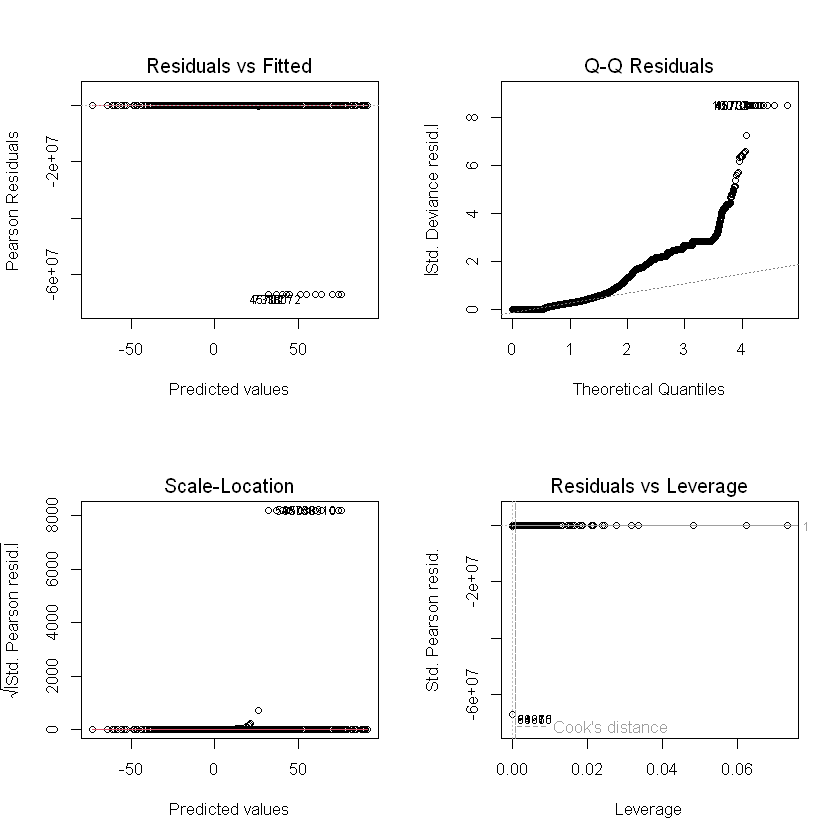

In [170]:
#Create logistic regression model
Model_1 <- glm(Class ~ ., data = oversampled_data, family = binomial)

#Summary of the model
summary(Model_1)

#Make predictions using the fitted model
predictions_1 <- ifelse(predict(Model_1, type = "response") > 0.5, 1, 0)

#Create confusion matrix
confusion_matrix_1 <- table(predictions_1, oversampled_data$Class)

#Print confusion matrix
print(confusion_matrix_1)

#Plot the graphs
par(mfrow=c(2,2))
plot(Model_1)

In [171]:
# Load the caret package
library(caret)

# Create confusion matrix object
confusion_matrix_1 <- confusionMatrix(factor(predictions_1), factor(oversampled_data$Class))

# Print the confusion matrix
print(confusion_matrix_1)

# Print summary statistics
print(confusion_matrix_1$overall)

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 139221  11365
         1   3215 129925
                                          
               Accuracy : 0.9486          
                 95% CI : (0.9478, 0.9494)
    No Information Rate : 0.502           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8972          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9774          
            Specificity : 0.9196          
         Pos Pred Value : 0.9245          
         Neg Pred Value : 0.9759          
             Prevalence : 0.5020          
         Detection Rate : 0.4907          
   Detection Prevalence : 0.5307          
      Balanced Accuracy : 0.9485          
                                          
       'Positive' Class : 0               
            

### MODEL 2

In [172]:
# removing outliers
# Function to remove outliers using IQR method
remove_outliers <- function(data, threshold = 1.5) {
  # Exclude non-numeric variables (assuming 'Class' is the target variable)
  numeric_data <- data[, sapply(data, is.numeric)]
  
  # Calculate IQR for each numeric variable
  Q1 <- apply(numeric_data, 2, quantile, probs = 0.25)
  Q3 <- apply(numeric_data, 2, quantile, probs = 0.75)
  IQR <- Q3 - Q1
  
  # Identify outliers for each variable
  outliers <- sapply(1:ncol(numeric_data), function(i) {
    lower_bound <- Q1[i] - threshold * IQR[i]
    upper_bound <- Q3[i] + threshold * IQR[i]
    numeric_data[, i] < lower_bound | numeric_data[, i] > upper_bound
  })
  
  # Remove rows containing outliers
  cleaned_data <- data[!apply(outliers, 1, any), ]
  
  return(cleaned_data)
}

# Remove outliers from your dataset
cleaned_data <- remove_outliers(oversampled_data)


In [173]:
nrow(cleaned_data)

[1] 154554

In [174]:
names(cleaned_data)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [175]:
# Calculate the point-biserial correlation between all numeric predictors and the target variable 'Class'
correlations <- sapply(cleaned_data[, sapply(cleaned_data, is.numeric)], function(x) cor(x, as.numeric(cleaned_data$Class)))

# Absolute correlation values
correlation_with_target <- abs(correlations)

# Sort features by their correlation with 'Class'
sorted_features <- sort(correlation_with_target, decreasing = TRUE)

# Display the sorted features
sorted_features

V14         V10         V12          V4         V11          V3 
0.786332168 0.722249800 0.700399699 0.672841112 0.662951338 0.645018262 
         V2          V7          V9         V27         V16         V21 
0.635199513 0.547394387 0.535387576 0.524278063 0.483219383 0.451424784 
        V17          V6         V20         V28          V8          V1 
0.445214475 0.435458663 0.397096216 0.396399863 0.396158981 0.210984516 
        V25         V23         V13         V15         V18         V24 
0.172145454 0.172137798 0.142067129 0.125164997 0.123733137 0.117834488 
     Amount         V22         V19         V26          V5        Time 
0.088440689 0.064846094 0.053740886 0.049192639 0.016459575 0.008457995

In [176]:
# Define a threshold for low correlation
threshold <- 0.05

# Identify features that have a correlation higher than the threshold
features_to_keep <- names(correlation_with_target[correlation_with_target > threshold])
features_to_keep

[1] "V1"     "V2"     "V3"     "V4"     "V6"     "V7"     "V8"     "V9"    
 [9] "V10"    "V11"    "V12"    "V13"    "V14"    "V15"    "V16"    "V17"   
[17] "V18"    "V19"    "V20"    "V21"    "V22"    "V23"    "V24"    "V25"   
[25] "V27"    "V28"    "Amount"

In [177]:
# Subset the data to keep only the features with high enough correlation
fraud_data_high_cor <- cleaned_data[, features_to_keep]

In [178]:
fraud_data_high_cor$Class <- cleaned_data$Class

In [179]:
str(fraud_data_high_cor)

'data.frame':	154554 obs. of  28 variables:
 $ V1    : num  -0.418 0.643 -0.269 -0.129 0.516 ...
 $ V2    : num  0.222 0.131 0.535 0.904 0.23 ...
 $ V3    : num  1.226 -0.0391 1.0215 -0.267 0.2583 ...
 $ V4    : num  -0.163 0.275 -0.129 0.331 1.912 ...
 $ V6    : num  0.75785 -0.19721 -0.09322 -0.00372 0.68528 ...
 $ V7    : num  -0.4979 -0.0534 0.3894 0.5005 -0.2782 ...
 $ V8    : num  0.7969 0.0262 0.215 -0.7063 0.4103 ...
 $ V9    : num  -0.262 -0.0713 -0.5207 -0.4459 -0.2809 ...
 $ V10   : num  -0.5901 -0.0907 -0.1574 0.6963 0.1668 ...
 $ V11   : num  1.5 0.744 1.395 0.178 1.222 ...
 $ V12   : num  0.896 0.328 0.426 0.487 0.122 ...
 $ V13   : num  0.365 -0.296 -0.643 0.343 -1.631 ...
 $ V14   : num  0.2589 -0.0253 0.505 0.5499 -0.839 ...
 $ V15   : num  1.6248 0.5699 0.5048 0.0173 -0.9098 ...
 $ V16   : num  0.2753 1.0931 0.147 -0.0587 0.1411 ...
 $ V17   : num  0.114 -0.638 -0.396 -0.927 1.315 ...
 $ V18   : num  0.211 0.658 -0.281 0.855 -0.332 ...
 $ V19   : num  -0.081 0.5153 -0

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = binomial, data = fraud_data_high_cor)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.08646    0.18735 -37.825  < 2e-16 ***
V1           4.37270    0.22660  19.297  < 2e-16 ***
V2          -7.79485    0.38092 -20.463  < 2e-16 ***
V3           2.24538    0.10476  21.434  < 2e-16 ***
V4           1.93324    0.04034  47.928  < 2e-16 ***
V6          -1.23028    0.22147  -5.555 2.77e-08 ***
V7           9.19106    0.63082  14.570  < 2e-16 ***
V8          10.71487    1.14748   9.338  < 2e-16 ***
V9           0.15122    0.17183   0.880    0.379    
V10         -0.16960    0.26310  -0.645    0.519    
V11          1.35774    0.09746  13.931  < 2e-16 ***
V12         -2.59024    0.18061 -14.341  < 2e-16 ***
V13          1.28540    0.11390  11.285  < 2e-16 ***
V14         -3.81346    0.27544 -13.845  < 2e-16 ***
V15          0.25653    0.04223   6.075 1.24e-09 ***
V16         -0.78523    0.13332  -5.890 3.86e-09 ***
V17  

             
predictions_2      0      1
            0 105430   5697
            1   1754  41673


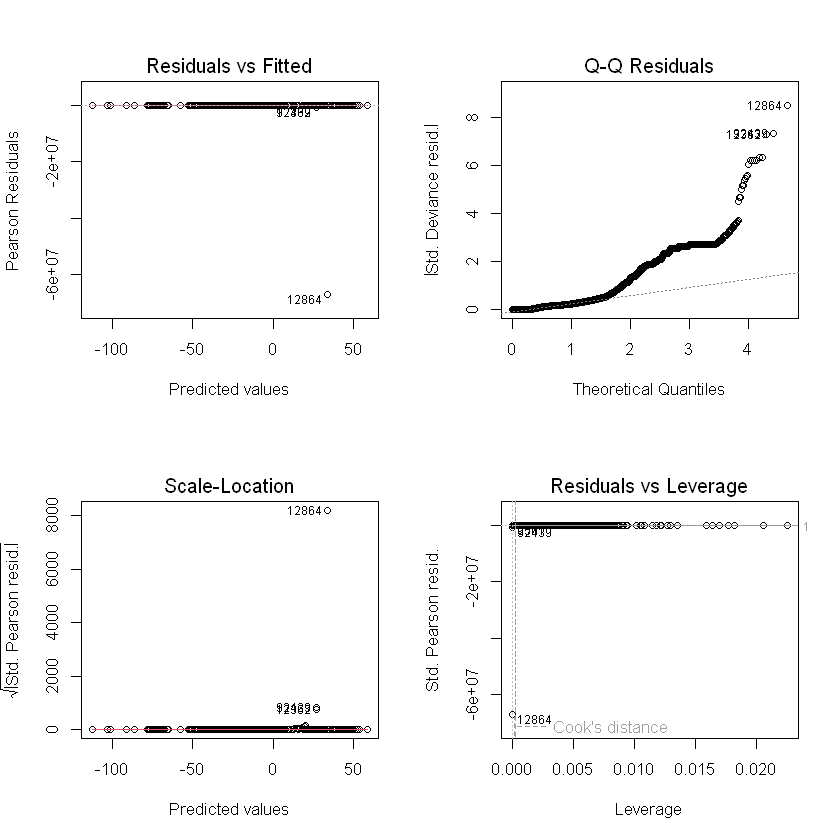

In [180]:
#Create logistic regression model
Model_2 <- glm(Class ~ ., data = fraud_data_high_cor, family = binomial)

#Summary of the model
summary(Model_2)

#Make predictions using the fitted model
predictions_2 <- ifelse(predict(Model_2, type = "response") > 0.5, 1, 0)

#Create confusion matrix
confusion_matrix_2 <- table(predictions_2, fraud_data_high_cor$Class)

#Print confusion matrix
print(confusion_matrix_2)

par(mfrow=c(2,2))
plot(Model_2)


In [181]:
# Load the caret package
library(caret)

# Create confusion matrix object
confusion_matrix_2 <- confusionMatrix(factor(predictions_2), factor(fraud_data_high_cor$Class))

# Print the confusion matrix
print(confusion_matrix_2)

# Print summary statistics
print(confusion_matrix_2$overall)

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 105430   5697
         1   1754  41673
                                          
               Accuracy : 0.9518          
                 95% CI : (0.9507, 0.9529)
    No Information Rate : 0.6935          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8839          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9836          
            Specificity : 0.8797          
         Pos Pred Value : 0.9487          
         Neg Pred Value : 0.9596          
             Prevalence : 0.6935          
         Detection Rate : 0.6822          
   Detection Prevalence : 0.7190          
      Balanced Accuracy : 0.9317          
                                          
       'Positive' Class : 0               
            

### MODEL 3

In [182]:
library(EFAtools)
library(psych)
library(caret)

# Check structure of the data
str(fraud_data_high_cor)

# Data preparation
fraud_data_high_cor$Class <- as.numeric(as.character(fraud_data_high_cor$Class))

'data.frame':	154554 obs. of  28 variables:
 $ V1    : num  -0.418 0.643 -0.269 -0.129 0.516 ...
 $ V2    : num  0.222 0.131 0.535 0.904 0.23 ...
 $ V3    : num  1.226 -0.0391 1.0215 -0.267 0.2583 ...
 $ V4    : num  -0.163 0.275 -0.129 0.331 1.912 ...
 $ V6    : num  0.75785 -0.19721 -0.09322 -0.00372 0.68528 ...
 $ V7    : num  -0.4979 -0.0534 0.3894 0.5005 -0.2782 ...
 $ V8    : num  0.7969 0.0262 0.215 -0.7063 0.4103 ...
 $ V9    : num  -0.262 -0.0713 -0.5207 -0.4459 -0.2809 ...
 $ V10   : num  -0.5901 -0.0907 -0.1574 0.6963 0.1668 ...
 $ V11   : num  1.5 0.744 1.395 0.178 1.222 ...
 $ V12   : num  0.896 0.328 0.426 0.487 0.122 ...
 $ V13   : num  0.365 -0.296 -0.643 0.343 -1.631 ...
 $ V14   : num  0.2589 -0.0253 0.505 0.5499 -0.839 ...
 $ V15   : num  1.6248 0.5699 0.5048 0.0173 -0.9098 ...
 $ V16   : num  0.2753 1.0931 0.147 -0.0587 0.1411 ...
 $ V17   : num  0.114 -0.638 -0.396 -0.927 1.315 ...
 $ V18   : num  0.211 0.658 -0.281 0.855 -0.332 ...
 $ V19   : num  -0.081 0.5153 -0

In [183]:
# Adequacy tests
Bartlett_Fraud <- bartlett.test(fraud_data_high_cor)
print(Bartlett_Fraud$p.value)
KMO_Fraud <- psych::KMO(fraud_data_high_cor)
print(KMO_Fraud$MSA)

[1] 0
[1] 0.6994175


Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"


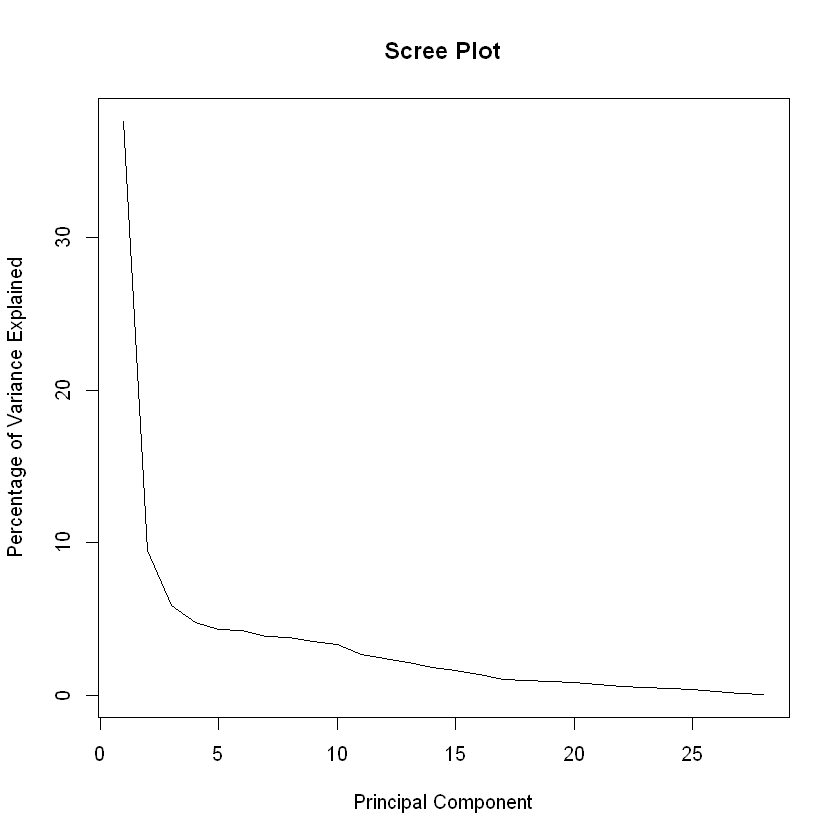

In [184]:
# Performing PCA
PCA_Fraud <- prcomp(fraud_data_high_cor, scale. = TRUE)
variance_explained <- PCA_Fraud$sdev^2 / sum(PCA_Fraud$sdev^2)
percentage_explained <- variance_explained * 100
plot(percentage_explained, type = "line", main = "Scree Plot", xlab = "Principal Component", ylab = "Percentage of Variance Explained")

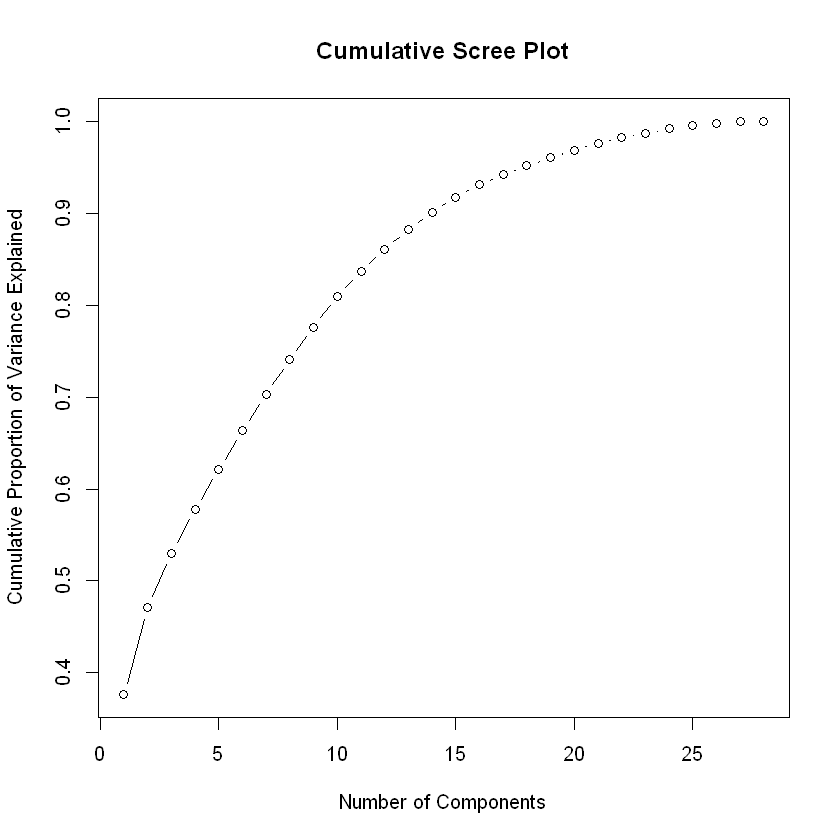

In [185]:
# Cumulative variance explained
cumulative_Variance <- cumsum(variance_explained)
plot(1:length(cumulative_Variance), cumulative_Variance, type = "b", main = "Cumulative Scree Plot", xlab = "Number of Components", ylab = "Cumulative Proportion of Variance Explained")


In [186]:
# Combine PCA scores with Class
PCA_scores <- predict(PCA_Fraud)
PCA_data_df <- as.data.frame(cbind(PCA_scores, Class = fraud_data_high_cor$Class))

In [187]:
# Logistic Regression Model
Model_3 <- glm(Class ~ ., data = PCA_data_df, family = binomial)
summary(Model_3)


Warning message:
"glm.fit: algorithm did not converge"



Call:
glm(formula = Class ~ ., family = binomial, data = PCA_data_df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  -10.2813   905.8595  -0.011    0.991
PC1           -5.8772   279.0514  -0.021    0.983
PC2           -3.1286   555.7465  -0.006    0.996
PC3           -0.6080   703.5942  -0.001    0.999
PC4           -2.8923   785.2933  -0.004    0.997
PC5            2.2506   822.3400   0.003    0.998
PC6            2.7881   832.3228   0.003    0.997
PC7           -0.4920   869.1989  -0.001    1.000
PC8            0.6439   876.1502   0.001    0.999
PC9           -0.9403   908.6892  -0.001    0.999
PC10           1.7405   936.5078   0.002    0.999
PC11          -0.4090  1048.0261   0.000    1.000
PC12           2.5223  1099.9154   0.002    0.998
PC13          -3.4999  1155.6241  -0.003    0.998
PC14           6.7577  1255.8539   0.005    0.996
PC15           8.4497  1338.7753   0.006    0.995
PC16          -6.5442  1463.7966  -0.004    0.996
PC17          

In [188]:
# Predictions and evaluation
predictions_3 <- ifelse(predict(Model_3, type = "response") > 0.5, 1, 0)
confusion_matrix_3 <- confusionMatrix(factor(predictions_3), factor(fraud_data_high_cor$Class))
print(confusion_matrix_3)
print(confusion_matrix_3$overall)

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 107184      0
         1      0  47370
                                   
               Accuracy : 1        
                 95% CI : (1, 1)   
    No Information Rate : 0.6935   
    P-Value [Acc > NIR] : < 2.2e-16
                                   
                  Kappa : 1        
                                   
 Mcnemar's Test P-Value : NA       
                                   
            Sensitivity : 1.0000   
            Specificity : 1.0000   
         Pos Pred Value : 1.0000   
         Neg Pred Value : 1.0000   
             Prevalence : 0.6935   
         Detection Rate : 0.6935   
   Detection Prevalence : 0.6935   
      Balanced Accuracy : 1.0000   
                                   
       'Positive' Class : 0        
                                   
      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     1.0000000      1.0000000      0.999